In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def generate_hypo_tests(sample_size, true_mean, true_effect, sim_count):
    sim_df = pd.DataFrame(columns = ['rejected','est_effect'])
    for r in range(0,sim_count):
        values = np.random.normal(true_mean,1 ,sample_size)
        values[-1] = values[-1] + true_effect
        
        r_bar = np.mean(values[0:-1] )
        sd = np.std(values[0:-1])
        effect_est = values[-1] - r_bar

        test_stat = np.sqrt((sample_size-1)/sample_size)*effect_est/sd
        rejected = 1*(test_stat > 1.65)
        sim_df.loc[r] = [rejected, effect_est]
    return sim_df

# Large number of simulations to illustrate bias

In [52]:
test_sims = generate_hypo_tests(10,1,0,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.0722
1.863005401907122


In [53]:
test_sims = generate_hypo_tests(20,1,0,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.0599
1.9462662993699893


In [54]:
test_sims = generate_hypo_tests(50,1,0,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.0552
1.9866893412306619


In [55]:
test_sims = generate_hypo_tests(10,1,1,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.3058
2.1454854720001326


In [56]:
test_sims = generate_hypo_tests(20,1,1,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.2843
2.1956580301065913


In [57]:
test_sims = generate_hypo_tests(50,1,1,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.2713
2.240085983690498


In [58]:
test_sims = generate_hypo_tests(10,1,2,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.6389
2.5732612110834157


In [59]:
test_sims = generate_hypo_tests(20,1,2,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.6429
2.5886306875209493


In [60]:
test_sims = generate_hypo_tests(50,1,2,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.6305
2.5940359662246935


In [61]:
test_sims = generate_hypo_tests(20,2,0,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.06
1.9256966379734721


In [62]:
test_sims = generate_hypo_tests(20,2,1,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.2767
2.2029346234805613


In [63]:
test_sims = generate_hypo_tests(20,2,4,10000)
print( len(test_sims.query('rejected > 0' ) )/len(test_sims)) 
print(  test_sims.query('rejected > 0')['est_effect'].mean() )

0.9882
4.029938684362172


# Fix T=10 and mu =1 to plot (Effect Size, Average Payment)

In [143]:
def hypo_test(values, effect_size):
    r_bar = np.mean(values[0:-1] )
    sd = np.std(values[0:-1])
    effect_est = effect_size + values[-1] - r_bar

    test_stat = np.sqrt((sample_size-1)/sample_size)*effect_est/sd
    rejected = 1*(test_stat > 1.65)
    
    return rejected*effect_est

In [144]:
plot_sim_df = pd.DataFrame(columns = ['effect'])
plot_sim_df['effect'] = np.linspace(0,3,50)

for sim in range(0,10000):
    values = np.random.normal(1,1,10)
    plot_sim_df[sim] =  plot_sim_df['effect'].apply(lambda s: hypo_test(values,s))

plot_sim_df = plot_sim_df.set_index('effect')

In [145]:
# plot_sim_df = plot_sim_df.set_index(['effect'])

row_sims = plot_sim_df.loc[3.0].copy()
row_sims.sum()/ sum(1*(row_sims > 0))

3.201327938543777

In [146]:
average_df = pd.DataFrame(columns = ['effect','avg_rejected']).set_index('effect')

for effect in plot_sim_df.index:
    row_sims = plot_sim_df.loc[effect].copy()
    
    average_df.loc[effect,'avg_rejected'] = row_sims.sum()/ sum(1*(row_sims > 0))
    

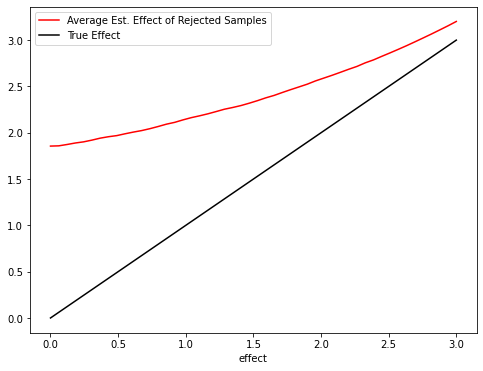

In [147]:
average_df = average_df.reset_index()
fig, ax = plt.subplots(figsize = (8,6))

average_df['true_effect'] = average_df['effect']
average_df.plot(x='effect', y='avg_rejected', ax = ax, label = 'Average Est. Effect of Rejected Samples', color ='red')
average_df.plot(x='effect',y='true_effect', ax = ax, label = 'True Effect', color = 'black')